<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/Code_along_1/blob/main/Analysing_Twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tweepy as tw
import pandas as pd
from google.colab import drive  # to mount Drive to Colab notebook


In [2]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/Data_DA_HT22'

In [7]:
import json

# Enter your keys/secrets as strings in the following fields
credentials = {}
credentials['CONSUMER_KEY'] = #your credentials
credentials['CONSUMER_SECRET'] = #your credentials
credentials['ACCESS_TOKEN'] = #your credentials 
credentials['ACCESS_SECRET'] = #your credentials 

# Save the credentials object to file
with open(path + "/secrets.json", "w") as file:
    json.dump(credentials, file)

In [9]:
# Load Twitter API secrets from an external JSON file
secrets = json.loads(open(path + '/secrets.json').read())
consumer_key = secrets['CONSUMER_KEY']
consumer_secret = secrets['CONSUMER_SECRET']
access_token = secrets['ACCESS_TOKEN']
access_token_secret = secrets['ACCESS_SECRET']


In [10]:
from tweepy import OAuthHandler
from tweepy import API

# Consumer key authentication(consumer_key,consumer_secret can be collected from our twitter developer profile)
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication(access_token,access_token_secret can be collected from our twitter developer profile)
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

In [15]:
# Define the search term and the date_since date as variables
search_words = "#översvämning"
#search_words = "#flooding"
date_since = "2022-08-01"

In [16]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="sv",
              #lang="en",
              since=date_since).items()
tweets


In [17]:
for tweet in tweets:
    print(tweet.text)

Pakistan is facing worst of the climate crisis right now so be kind &amp; help at little to @AlkhidmatOrg 
Donate… https://t.co/lyAjmadatq
RT @NDNews_Weather: Flooding in Siebnen due to storms in Europe, Switzerland.

📅 August 19
Översvämningar i Siebnen på grund av stormar i E…
RT @FatalisT69: Flooding in Siebnen due to storms in Europe, Switzerland.

📅 August 19
Översvämningar i Siebnen på grund av stormar i Europ…


In [18]:
#Ta bort re-tweets
new_search = search_words + " -filter:retweets"
new_search

'#översvämning -filter:retweets'

In [20]:
# Collect tweets
tweets_no_retweet = tw.Cursor(api.search,
              q=new_search,
              lang="sv",
              #lang="en",
              since=date_since).items()
tweets_no_retweet


In [21]:
# Iterate and print tweets
for tweet in tweets_no_retweet:
    print(tweet.text)
    

Pakistan is facing worst of the climate crisis right now so be kind &amp; help at little to @AlkhidmatOrg 
Donate… https://t.co/lyAjmadatq


Ladda tweets i en lista istället

In [22]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="sv",
              #lang="en",
              since=date_since).items(50)

# Save a list of tweets, only the text field.
tweet_list= [tweet.text for tweet in tweets]
#Skriv ut lista
tweet_list

['Pakistan is facing worst of the climate crisis right now so be kind &amp; help at little to @AlkhidmatOrg \nDonate… https://t.co/lyAjmadatq',
 'RT @NDNews_Weather: Flooding in Siebnen due to storms in Europe, Switzerland.\n\n📅 August 19\nÖversvämningar i Siebnen på grund av stormar i E…',
 'RT @FatalisT69: Flooding in Siebnen due to storms in Europe, Switzerland.\n\n📅 August 19\nÖversvämningar i Siebnen på grund av stormar i Europ…']

In [23]:
#Vem har twittrat?
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="sv",
                       since=date_since).items(5)
                       
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['Bint_e_Sadiq', 'پاکستان/سویڈن']]

En tweet levereras från twitters API som ett JSON objekt. För att hämta ett antal tweets och spara texten och det datum de skapats från dem i en csv-fil kan följande kod användas. Det går också att spara direkt som en JSON-fil.

In [24]:
import csv

# Open/Create a file to append data
csvFile = open(path + '/tweets_oversvamning.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tw.Cursor(api.search,q=search_words,count=100,
                           lang="sv",
                           since=date_since).items(10):
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2022-08-28 17:46:34 Pakistan is facing worst of the climate crisis right now so be kind &amp; help at little to @AlkhidmatOrg 
Donate… https://t.co/lyAjmadatq
2022-08-22 18:46:06 RT @NDNews_Weather: Flooding in Siebnen due to storms in Europe, Switzerland.

📅 August 19
Översvämningar i Siebnen på grund av stormar i E…
2022-08-21 00:08:54 RT @FatalisT69: Flooding in Siebnen due to storms in Europe, Switzerland.

📅 August 19
Översvämningar i Siebnen på grund av stormar i Europ…


# Det finns mängder med interna metoder för ett enda Twitterobjekt i Tweepy. VI hämtar alla tweets från en specifik användare och tittar på vilken information vi kan extrahera från en tweet.

In [25]:
# We create a tweet list as follows:
tweets_svt = api.user_timeline(screen_name="svtnyheter", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_svt)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets_svt[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

Naturbeteskött växer långsamt och djuren lever länge innan de går till slakt. Det gör att de har stor påverkan på k… https://t.co/NZ65DYJFU3

Klockan 12:38 slog färjan Stena Scandica larm, en brand hade brutit ut på deras bildäck och nu kämpade besättningen… https://t.co/oSj0UhnpGi

Inflation och skenande elpriser gör att vi pratar om pengar som aldrig förr. Är det okej att skryta om sin ekonomi?… https://t.co/e3Dg9lBQvC

Tonåringen begärdes häktad i sin frånvaro.

https://t.co/rdtcsKC8NA

Det brinner på ett bildäck på en passagerarfärja utanför Gotska Sandön. "Vi har larmat ut alla tillgängliga enheter… https://t.co/phAnGbLcrI



In [26]:
# Internal methods of a single tweet object:
dir(tweets_svt[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

# Dags för nästa steg, data wrangling och deskriptiv statistik för att lära känna vår datamängd.

In [27]:
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]

In [28]:
#lägg data i en dataframe

svt_tweets = pd.DataFrame(data=[tweet.text for tweet in tweets_svt], columns=['Tweets'])
svt_tweets



,Tweets
0,Naturbeteskött växer långsamt och djuren lever...
1,"Klockan 12:38 slog färjan Stena Scandica larm,..."
2,Inflation och skenande elpriser gör att vi pra...
3,Tonåringen begärdes häktad i sin frånvaro.\n\n...
4,Det brinner på ett bildäck på en passagerarfär...
...,...
195,Den ryska ekonomin går betydligt sämre än vad ...
196,Inflationsmålet behöver höjas. Det säger profe...
197,Turerna kring FBI-razzian vid expresidenten Do...
198,Inflationstakten i Sverige nådde 8 procent i j...


In [29]:
#lite mer information om varje tweet som kan vara intressant
svt_tweets['len']  = [len(x.text) for x in tweets_svt]  # number of characters in a tweet (think length)
svt_tweets['ID']   = [x.id for x in tweets_svt]
svt_tweets['Source'] = [x.source for x in tweets_svt]
svt_tweets['Likes']  = [x.favorite_count for x in tweets_svt] # favorite_count
svt_tweets['RTs']    =  [x.retweet_count for x in tweets_svt]  # retweet count

svt_tweets

,Tweets,len,ID,Source,Likes,RTs
0,Naturbeteskött växer långsamt och djuren lever...,140,1564323159163158530,Twitter Web App,6,0
1,"Klockan 12:38 slog färjan Stena Scandica larm,...",140,1564322993169485825,Twitter Web App,5,0
2,Inflation och skenande elpriser gör att vi pra...,140,1564261408325476353,Twitter Web App,11,1
3,Tonåringen begärdes häktad i sin frånvaro.\n\n...,67,1564245756210462721,Twitter Web App,10,4
4,Det brinner på ett bildäck på en passagerarfär...,140,1564214080658984961,Twitter Web App,9,3
...,...,...,...,...,...,...
195,Den ryska ekonomin går betydligt sämre än vad ...,140,1558053361148125185,Twitter Web App,35,3
196,Inflationsmålet behöver höjas. Det säger profe...,139,1558028832900259840,Twitter Web App,7,3
197,Turerna kring FBI-razzian vid expresidenten Do...,140,1558001379653959680,Twitter Web App,20,2
198,Inflationstakten i Sverige nådde 8 procent i j...,140,1557971134729097218,Twitter Web App,23,2


Lite mer funktioner för att bekanta oss med den textdata vi ska analysera..

In [30]:
svt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  200 non-null    object
 1   len     200 non-null    int64 
 2   ID      200 non-null    int64 
 3   Source  200 non-null    object
 4   Likes   200 non-null    int64 
 5   RTs     200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [31]:
svt_tweets.shape

(200, 6)

# Städning av textdata

In [32]:
#Vi är ju faktiskt bara intresserade av fritexten i varje tweet, plocka ut denna kolumn
tweets_corpus = svt_tweets.Tweets
tweets_corpus

0      Naturbeteskött växer långsamt och djuren lever...
1      Klockan 12:38 slog färjan Stena Scandica larm,...
2      Inflation och skenande elpriser gör att vi pra...
3      Tonåringen begärdes häktad i sin frånvaro.\n\n...
4      Det brinner på ett bildäck på en passagerarfär...
                             ...                        
195    Den ryska ekonomin går betydligt sämre än vad ...
196    Inflationsmålet behöver höjas. Det säger profe...
197    Turerna kring FBI-razzian vid expresidenten Do...
198    Inflationstakten i Sverige nådde 8 procent i j...
199    Från och med nu är det fritt fram för politisk...
Name: Tweets, Length: 200, dtype: object

In [33]:
#Ta bort emojiis
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0      Naturbetesktt vxer lngsamt och djuren lever ln...
1      Klockan 12:38 slog frjan Stena Scandica larm, ...
2      Inflation och skenande elpriser gr att vi prat...
3      Tonringen begrdes hktad i sin frnvaro.\n\nhttp...
4      Det brinner p ett bildck p en passagerarfrja u...
                             ...                        
195    Den ryska ekonomin gr betydligt smre n vad lan...
196    Inflationsmlet behver hjas. Det sger professor...
197    Turerna kring FBI-razzian vid expresidenten Do...
198    Inflationstakten i Sverige ndde 8 procent i ju...
199    Frn och med nu r det fritt fram fr politiska p...
Name: Tweets, Length: 200, dtype: object

In [34]:
#Ta bort URL:er
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0      Naturbetesktt vxer lngsamt och djuren lever ln...
1      Klockan 12:38 slog frjan Stena Scandica larm, ...
2      Inflation och skenande elpriser gr att vi prat...
3             Tonringen begrdes hktad i sin frnvaro.\n\n
4      Det brinner p ett bildck p en passagerarfrja u...
                             ...                        
195    Den ryska ekonomin gr betydligt smre n vad lan...
196    Inflationsmlet behver hjas. Det sger professor...
197    Turerna kring FBI-razzian vid expresidenten Do...
198    Inflationstakten i Sverige ndde 8 procent i ju...
199    Frn och med nu r det fritt fram fr politiska p...
Name: Tweets, Length: 200, dtype: object

När vi städat klart behöver vi skapa en datamängd som vi kan analysera, hur det bör göras beror på vad vi vill analysera. I detta fall vill vi undersöka trender, eller ofta förekommande ämnen. För detta är en möjlighet att räkna ord (det gör man generellt "alltid" när man jobbar med NLP). 

Vad vi behöver då är en Term Document Matrix (TDM), också kallad Document Term Matrix (DTM). En TDM är en tabell som fångar antal ord i ett dokument. Exempelvis kan vi räkna ord i varje tweet och slagra detta i en rad i vår TDM. 

Vi kan dessutom förvänta oss att behöva utföra detta flera gånger, och därmed vill vi ha en funktion för detta. 

In [35]:
tm.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
stopWords = set(stopwords.words('swedish'))
#stopWords

In [49]:
#definiera en funktion som tar ett corpus med text och det antal som ett ord måste förkomma för att vara med i matrisen (en gång här)
def create_term_document_matrix(corpus, min_df=1):
    #Instansiera objektet med givna inparametrar
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
    #Skapa en matris för hela corpuset 
    tfmatrix = cvec.fit_transform(corpus)
    #Returnera den skapade matrisen som en DataFrame
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names_out())

In [50]:
create_term_document_matrix(clean_tweets.head(5))

,12,38,aldrig,begrdes,besttningen,bildck,brand,brinner,brutit,djuren,...,skenande,skryta,slakt,slog,stena,stor,tillgngliga,tonringen,utanfr,vxer
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,1,1,0,0,1,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [51]:
#antal rader och kolumner i vår TDM, vad betyder det?
_.shape

(5, 46)

För att räkna ut de ord som är mest frekventa så definierar vi en ny funktion, som visulaiserar de mest frekvent förkommande orden.

In [52]:
def plot_top_words(tweets, num_word_instances, top_words):
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    sorted_words = word_frequencies.sort_values(ascending=False)
    top_sorted_words = sorted_words[:num_word_instances]
    top_sorted_words[:top_words].plot.bar()
    return top_sorted_words

fr           54
svt          24
nr           12
enligt       12
frn          11
sger         10
flera        10
ska          10
ukraina       9
hr            9
gr            9
sverige       8
tv            8
senaste       8
annie         8
kommer        8
visar         8
lf            8
magdalena     7
stockholm     7
dtype: int64

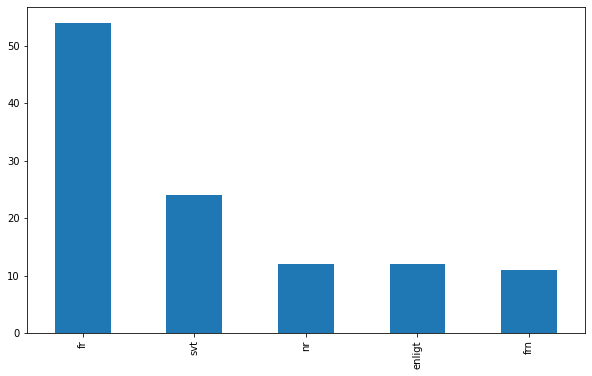

In [53]:
#vilka ord är mest frekventa i vår sökning?
top_words = plot_top_words(clean_tweets, 20, 5)
top_words

In [54]:
#gör om stora bokstäver till små
tweets_lowered = clean_tweets.str.lower()

fr           54
svt          24
nr           12
enligt       12
frn          11
sger         10
flera        10
ska          10
ukraina       9
hr            9
gr            9
sverige       8
tv            8
senaste       8
annie         8
kommer        8
visar         8
lf            8
magdalena     7
stockholm     7
dtype: int64

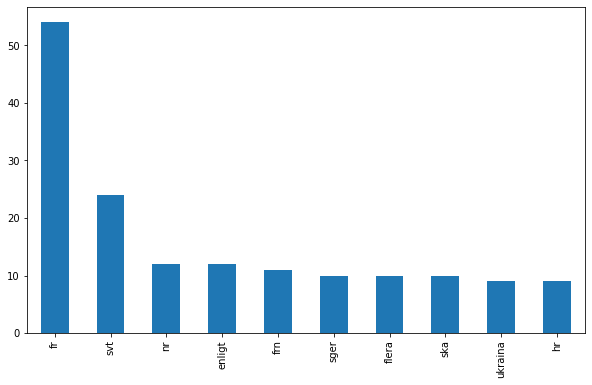

In [55]:
top_words_lowered = plot_top_words(tweets_lowered, 20, 10)
top_words_lowered

In [56]:
pd.DataFrame(
    {
        "Top tweeted clean": top_words[0:20].index,
        "Top tweeted lowered": top_words_lowered[0:20].index,
    }
)

,Top tweeted clean,Top tweeted lowered
0,fr,fr
1,svt,svt
2,nr,nr
3,enligt,enligt
4,frn,frn
5,sger,sger
6,flera,flera
7,ska,ska
8,ukraina,ukraina
9,hr,hr


In [57]:
#ta bort ord som är 3 bokstäver eller kortare
tweets_low_no_small = tweets_lowered.str.replace(r"\b\w{1,3}\b", "")
tweets_low_no_small

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0      naturbetesktt vxer lngsamt  djuren lever lnge ...
1      klockan : slog frjan stena scandica larm,  bra...
2      inflation  skenande elpriser    pratar  pengar...
3                 tonringen begrdes hktad   frnvaro.\n\n
4       brinner   bildck   passagerarfrja utanfr gots...
                             ...                        
195     ryska ekonomin  betydligt smre   landet velat...
196    inflationsmlet behver hjas.  sger professorn l...
197    turerna kring -razzian  expresidenten donalds ...
198    inflationstakten  sverige ndde  procent  juli,...
199          fritt fram  politiska partier  affischer...
Name: Tweets, Length: 200, dtype: object

enligt                 12
flera                  10
sger                   10
ukraina                 9
senaste                 8
visar                   8
annie                   8
kommer                  8
sverige                 8
regering                7
magdalena               7
stockholm               7
emporia                 6
kristersson             6
valet                   6
polisen                 6
vill                    6
statsminister           6
plats                   5
personer                5
socialdemokraterna      5
partiledarutfrgning     5
just                    5
stor                    5
partier                 5
moderaterna             5
mats                    5
andersson               5
partiledare             4
nooshi                  4
frgas                   4
menar                   4
malm                    4
kring                   4
natten                  4
politiska               4
ryska                   4
staden                  4
sveriges    

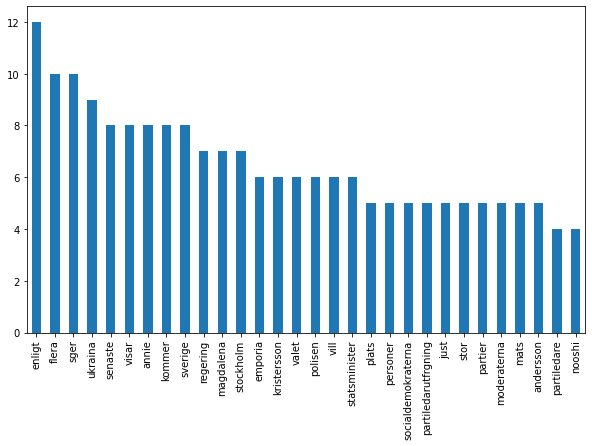

In [58]:
# Skapar ny topplista utan korta ord
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)
top_words_low_no_small